Random Forest Algorithm with Python and Scikit-Learn
-------------------------------------------------------------------------------

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

How the Random Forest Algorithm Works
------------------------------------------------------------

The following are the basic steps involved in performing the random forest algorithm:

1> Pick N random records from the dataset.
2> Build a decision tree based on these N records.
3> Choose the number of trees you want in your algorithm 
   and repeat steps 1 and 2.
4> In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. 
Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

Advantages of using Random Forest
-----------------------------------------------------
As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

1> The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.

2> This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.

3> The random forest algorithm works well when you have both categorical and numerical features. 

4> The random forest algorithm also works well when data has missing values or it has not been scaled well.

Disadvantages of using Random Forest
---------------------------------------------------------
1> A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.

2> Due to their complexity, they require much more time to train; than other comparable algorithms.

1> Using Random Forest for Regression
----------------------------------------------------------

Problem Definition : The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

In [1]:
# Import Libraries
import pandas as pd  
import numpy as np  

dataset = pd.read_csv('C:\Program Files\Python36\suven\ML\datasets_n_images\datasets_module_4/petrol_consumption.csv')  
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [2]:
# Preparing the Data
# divide the data into attributes and labels

X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  

# dividing data into training and testing set .. type your code here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)



# Training and Making Predictions
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# The RandomForestRegressor class of the sklearn.ensemble library
# is used to solve regression problems via random forest. 
# The most important parameter of the RandomForestRegressor class 
# is the n_estimators parameter. 
# This parameter defines the number of trees in the random forest.

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


With 20 trees, the root mean squared error is 64.93 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

In [3]:
# If the number of estimators is changed to 200, the results are as follows:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.124500000000005
Mean Squared Error: 3497.802072500001
Root Mean Squared Error: 59.142219035981405


With 200 trees, the root mean squared error is 59.14 which is close to 10 percent of the average petrol consumption i.e. 576.77.  (~ these values may change depending upon the train-test data set )

The learner / Student is expected to try n_estimators values of 220 and 250. 
Do you observe any difference ? 

In [5]:
regressor = RandomForestRegressor(n_estimators=220, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.297272727272734
Mean Squared Error: 3508.4540165289254
Root Mean Squared Error: 59.23220421805122


In [6]:
regressor = RandomForestRegressor(n_estimators=250, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47.988800000000005
Mean Squared Error: 3483.7623904000016
Root Mean Squared Error: 59.02340544563658


In [11]:
list1=[]
list2=[]
for i in range(100,500,50):
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)  
    regressor.fit(X_train, y_train)  
    y_pred = regressor.predict(X_test)  

    # Evaluating the Algorithm
    from sklearn import metrics

    print("number of estimator is===========>",i)
    list1.append(i)
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    list2.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("list1",list1,"list2",list2)

number of estimator is===========> 100
Root Mean Squared Error: 60.207914180778594
list1 [100] list2 [60.207914180778594]
number of estimator is===========> 150
Root Mean Squared Error: 59.54858852697984
list1 [100, 150] list2 [60.207914180778594, 59.54858852697984]
number of estimator is===========> 200
Root Mean Squared Error: 59.142219035981405
list1 [100, 150, 200] list2 [60.207914180778594, 59.54858852697984, 59.142219035981405]
number of estimator is===========> 250
Root Mean Squared Error: 59.02340544563658
list1 [100, 150, 200, 250] list2 [60.207914180778594, 59.54858852697984, 59.142219035981405, 59.02340544563658]
number of estimator is===========> 300
Root Mean Squared Error: 58.92556828557343
list1 [100, 150, 200, 250, 300] list2 [60.207914180778594, 59.54858852697984, 59.142219035981405, 59.02340544563658, 58.92556828557343]
number of estimator is===========> 350
Root Mean Squared Error: 58.733075985290235
list1 [100, 150, 200, 250, 300, 350] list2 [60.207914180778594, 59.

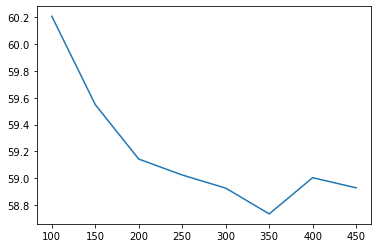

In [13]:
import matplotlib.pyplot as plt

plt.plot(list1, list2)

2: Using Random Forest for Classification
------------------------------------------------------------

Problem Definition : The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

In [14]:
# doing the minimum necessary imports
# more modules would be imported as and when needed

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# reading data from CSV file. 
# reading bank currency note data into pandas dataframe.
bankdata = pd.read_csv("C:\Program Files\Python36\suven\ML\datasets_n_images\datasets_module_4/bill_authentication.csv")  

# Exploratory Data Analysis
print(bankdata.shape)  
print("------------")
print(bankdata.head()) 

(1372, 5)
------------
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


0.9890909090909091
0.9890909090909091
0.9890909090909091
0.9854545454545455
0.9890909090909091
0.9890909090909091
0.9854545454545455
0.9854545454545455


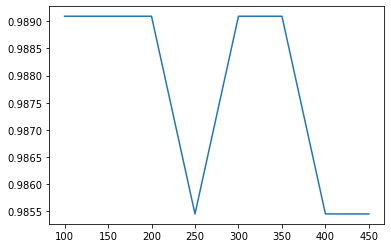

In [36]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.

# To divide the data into attributes and labels -- type your code
X = bankdata.drop('Class',axis=1)
y = bankdata['Class']

# the final preprocessing step is to divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


lsit3=[]

# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
for i in range(100,500,50):
    Classifier = RandomForestClassifier(n_estimators=i, random_state=0)  
    Classifier.fit(X_train, y_train)  
    y_pred = Classifier.predict(X_test) 


    # Evaluating the Algorithm
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#     print(confusion_matrix(y_test,y_pred))  
#     print(classification_report(y_test,y_pred))  
    print(accuracy_score(y_test, y_pred))
    lsit3.append(accuracy_score(y_test, y_pred))
import matplotlib.pyplot as plt

plt.plot(list1, lsit3)

**Test the above classifier model for a new record**

In [30]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [35]:
test=(bankdata.iloc[0]+bankdata.iloc[1])/2

In [47]:

X_test1=test.drop(['Class'])
print(X_test1)
X_test1=np.ndarray.reshapes(X_test1)

Variance    4.083750
Skewness    8.416750
Curtosis   -2.632950
Entropy    -0.954545
dtype: float64


AttributeError: type object 'numpy.ndarray' has no attribute 'reshapes'

In [42]:
y_pred = Classifier.predict(X_test1) 

ValueError: Expected 2D array, got 1D array instead:
array=[ 4.08375   8.41675  -2.63295  -0.954545].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

The accuracy achieved for by our random forest classifier with 20 trees is 100%. 

The learner / Student is expected to try n_estimators values of 10 and 50. 
Do you observe any difference ?